<p align="center">
<img style="width:60%" src="http://www.clipartbest.com/cliparts/yio/LdA/yioLdA9eT.jpg">
</p>

[Image source](http://www.clipartbest.com/clipart-yioLdA9eT)

<h1 style="text-align: center; color:#01872A; font-size: 80px;
background:#daf2e1; border-radius: 20px;
">House prices.<br> Part 1. EDA.</h1>

## Please use nbviewer to read this notebook to use all it's features:

https://nbviewer.org/github/sersonSerson/Projects/blob/master/Regression/HousePrice/01%20EDA.ipynb

# <span style="color:#01872A; display: block; padding:10px; background:#daf2e1;border-radius:20px; text-align: center; font-size: 40px; "> Contents </span>

## 1.   [Overview of data.](#step1)
## 2.	[Univariate feature analysis.](#step2)
## 3.	[Bivariate feature analysis.](#step3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, \
    StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [2]:
pd.options.display.max_columns = 80
pd.options.display.max_rows = 30
pd.options.display.max_colwidth = 60

In [3]:
# Configure Matplotlib and seaborn
plt.style.use('seaborn-muted')
sns.set_palette('muted')
plt.rcParams['figure.figsize'] = (16,5);
plt.rcParams['figure.facecolor'] = '#daf2e1'
plt.rcParams['axes.facecolor'] = '#daf2e1'
plt.rcParams['axes.grid'] = True
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['image.cmap']=cm.tab10
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
cmap = cm.tab10
blue = cmap.colors[0]
orange = cmap.colors[1]
green = cmap.colors[2]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [blue, orange,
                                                             green])
matplotlib.cm.register_cmap("mycolormap", cmap)
cpal = sns.color_palette("mycolormap", n_colors=60)


<div id="step1">
</div>

# <span style="color:#01872A; display: block; padding:10px; background:#daf2e1;border-radius:20px; text-align: center; font-size: 40px; "> Step 1. Overview of data. </span>

## Load data

In [4]:
train = pd.read_csv('Data/train.csv', index_col=0)
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
X_train.shape, y_train.shape

((1460, 79), (1460,))

In [5]:
X_test = pd.read_csv('Data/test.csv', index_col=0)
X_test.shape

(1459, 79)

In [6]:
full_data = pd.concat([X_train, X_test])
# full_data['SalePrice'] = y_train
full_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


### Missing data

In [7]:
def missing_data(dataset, min_missing=None):
    import matplotlib
    cmap = matplotlib.cm.tab10
    green_hex = matplotlib.colors.to_hex(cmap.colors[2])

    missing_df = pd.DataFrame([dataset.isna().sum(), dataset.isna().sum() /
                               len(dataset)]).T
    missing_df.columns = ['Missing', 'MissingPercent']
    if min_missing:
        missing_df = missing_df[missing_df['Missing'] >= min_missing]
    format_dict = {selected_column: "{:10,.4f}" for selected_column in
                   ['Missing', 'MissingPercent']}
    style = missing_df.style.apply(lambda x: [f'background-color: {green_hex}'
                                   for i in x])
    style.format(format_dict).bar(subset=["Missing", 'MissingPercent'])
    return style

missing_data(full_data, min_missing=1)

,Missing,MissingPercent
MSZoning,4.0000,0.0014
LotFrontage,486.0000,0.1665
Alley,"2,721.0000",0.9322
Utilities,2.0000,0.0007
Exterior1st,1.0000,0.0003
Exterior2nd,1.0000,0.0003
MasVnrType,24.0000,0.0082
MasVnrArea,23.0000,0.0079
BsmtQual,81.0000,0.0277
BsmtCond,82.0000,0.0281


In [8]:
numerical_features = [column for column in full_data.columns if
                    is_numeric_dtype(full_data[column])]
categorical_features = [column for column in full_data.columns if
                    is_string_dtype(full_data[column])]
print(f'Total features: {len(full_data.columns)} \n'
      f'Numerical features: {len(numerical_features)}\n'
      f'Categorical features: {len(categorical_features)}')
# numerical_features.remove('SalePrice')

Total features: 79 
Numerical features: 36
Categorical features: 43


In [9]:
def overall_statistics(df, features, columns=None):
    import matplotlib.colors
    blue_hex = matplotlib.colors.to_hex(blue)
    orange_hex = matplotlib.colors.to_hex(orange)
    green_hex = matplotlib.colors.to_hex(green)

    df_t = df.describe().T

    if columns is None:
        columns =  ['count', 'min', 'mean', 'max', 'std']
    df_stats = df_t.loc[features, columns]
    df_stats.sort_values('mean', inplace=True, ascending=False)
    df_stats['dtype'] = df[features].dtypes.astype('str')
    format_dict = {column: "{:10,.2f}" for column in columns}
    return df_stats.style.format(format_dict)\
                     .bar(subset=["mean"], color=green_hex)\
                     .bar(subset=["max"], color=blue_hex)\
                     .bar(subset=["std"], color=orange_hex)

overall_statistics(full_data, numerical_features, columns=None)

,count,min,mean,max,std,dtype
LotArea,"2,919.00","1,300.00","10,168.11","215,245.00","7,887.00",int64
YrSold,"2,919.00","2,006.00","2,007.79","2,010.00",1.31,int64
YearRemodAdd,"2,919.00","1,950.00","1,984.26","2,010.00",20.89,int64
GarageYrBlt,"2,760.00","1,895.00","1,978.11","2,207.00",25.57,float64
YearBuilt,"2,919.00","1,872.00","1,971.31","2,010.00",30.29,int64
GrLivArea,"2,919.00",334.00,"1,500.76","5,642.00",506.05,int64
1stFlrSF,"2,919.00",334.00,"1,159.58","5,095.00",392.36,int64
TotalBsmtSF,"2,918.00",0.00,"1,051.78","6,110.00",440.77,float64
BsmtUnfSF,"2,918.00",0.00,560.77,"2,336.00",439.54,float64
GarageArea,"2,918.00",0.00,472.87,"1,488.00",215.39,float64


## <span style="color:#01872A;display: block; font-style: italic;padding:10px; background:#daf2e1;border-radius:20px; text-align: left; font-size: 30px; "> Step 1 results: </span>

1. Lots of missing data in **PoolQC, MiscFeature, Alley and some other**
columns. Need to consider imputing strategies.
2. Magnitude of feature values is quite different, so scaling will be needed
for non-tree-based models.

<div id="step2">
</div>

# <span style="color:#01872A; display: block; padding:10px; background:#daf2e1;border-radius:20px; text-align: center; font-size: 40px; "> Step 2. Univariate feature analysis. </span>

## Function to plot numbers on bars

In [10]:
def autolabel(rects, ax, decimals=2, inside=False, old_rects=None):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for index, rect in enumerate(rects):
        height = rect.get_height()
        value = round(height, decimals)
        if inside:
            height = height / 2
        if old_rects:
            height += old_rects[index].get_height()
        ax.annotate('{}'.format(value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    size=18,# 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

### Feature distributions

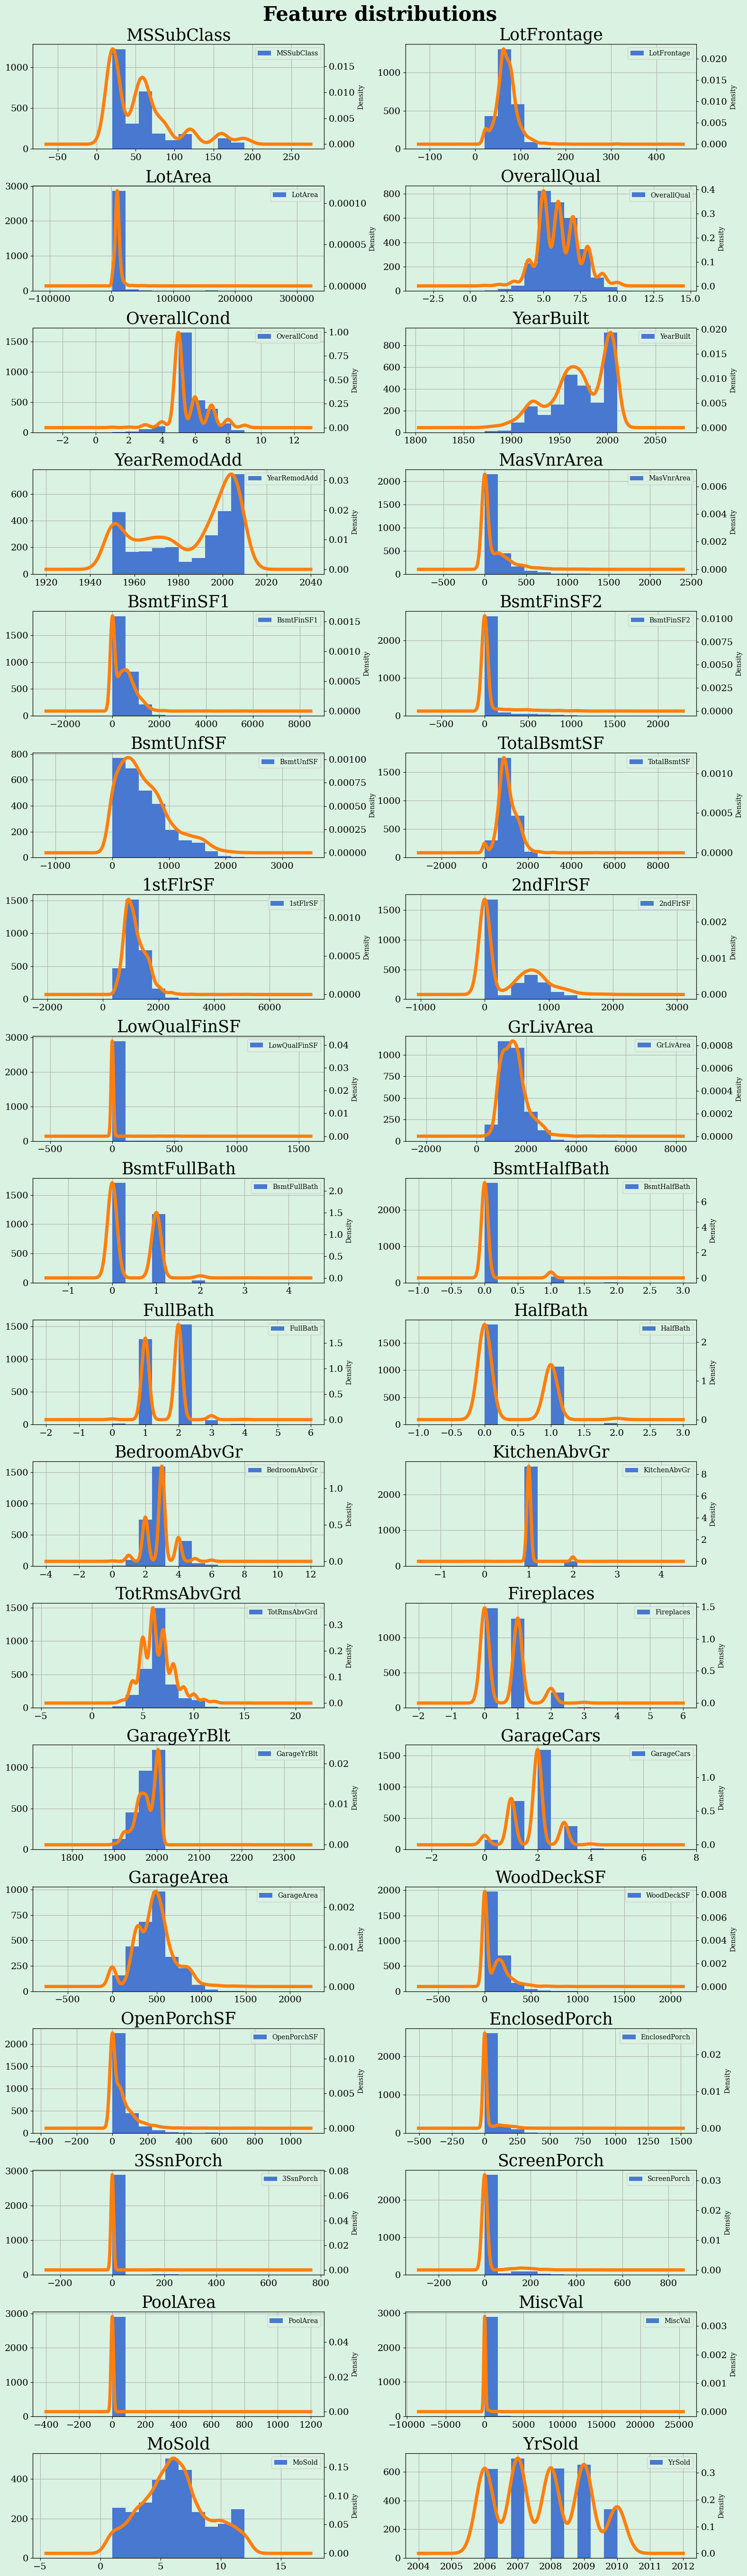

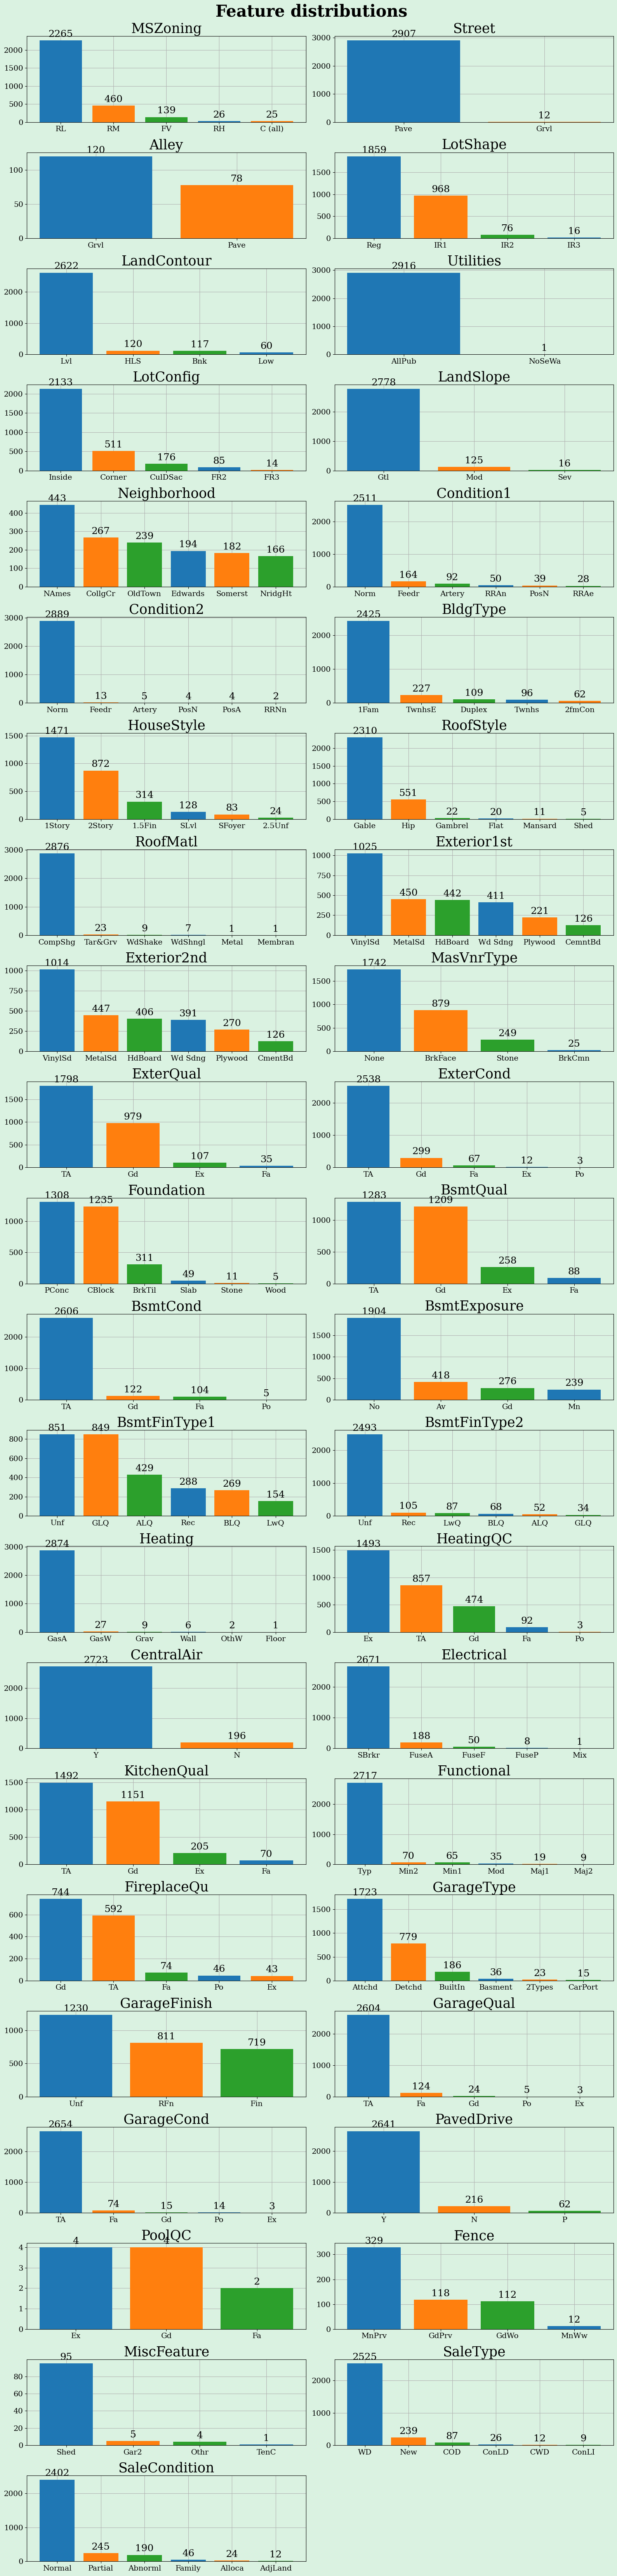

In [11]:
def feature_distibutions(df, columns=None, type='hist', max_cat_values=None):
    if columns is None:
        columns = df.columns.tolist()

    plot_columns = 2
    plot_rows = int(np.ceil(len(columns) / plot_columns))
    fig, axes = plt.subplots(plot_rows, plot_columns,
                             figsize=(16, max(8, plot_rows * 3)))
    if type == 'hist':
        df[columns].hist(ax=axes.ravel()[:len(columns)], legend=True,
                         zorder=3)
        df[columns].plot(kind='kde', secondary_y=True, subplots=True,
                         ax=axes.ravel()[:len(columns)], color=orange,
                         legend=False)
    elif type == 'bar':
        for column, ax in zip(columns, axes.ravel()):
            bar_values = df[column].value_counts()
            if max_cat_values:
                bar_values = bar_values[:max_cat_values]
            rects = ax.bar(bar_values.index, bar_values,
                           color=[blue, orange, green], zorder=3)
            autolabel(rects, ax)
            ax.set_title(column)
            ax.set_xticks(bar_values.index)
    if len(columns) / plot_columns != int(len(columns) / plot_columns):
        last_ax = axes.ravel()[-1]
        last_ax.axis('off')
    fig.text(0.35, 1.00, 'Feature distributions',
             transform=fig.transFigure,
             size=30, fontweight='bold')
    plt.tight_layout()
    plt.show()
feature_distibutions(full_data, columns=numerical_features, type='hist')
feature_distibutions(full_data, columns=categorical_features, type='bar',
                     max_cat_values=6)

In [12]:
bin_grid = [0, 100000, 200000, 300000, 400000, 1000000]
train['PriceBinned'] = \
    pd.cut(train['SalePrice'].dropna(), bins=bin_grid, precision=0)
train['PriceBinned']

Id
1       (200000, 300000]
2       (100000, 200000]
3       (200000, 300000]
4       (100000, 200000]
5       (200000, 300000]
              ...       
1456    (100000, 200000]
1457    (200000, 300000]
1458    (200000, 300000]
1459    (100000, 200000]
1460    (100000, 200000]
Name: PriceBinned, Length: 1460, dtype: category
Categories (5, interval[int64, right]): [(0, 100000] < (100000, 200000] < (200000, 300000] < (300000, 400000] < (400000, 1000000]]

### Dependent variable distributions

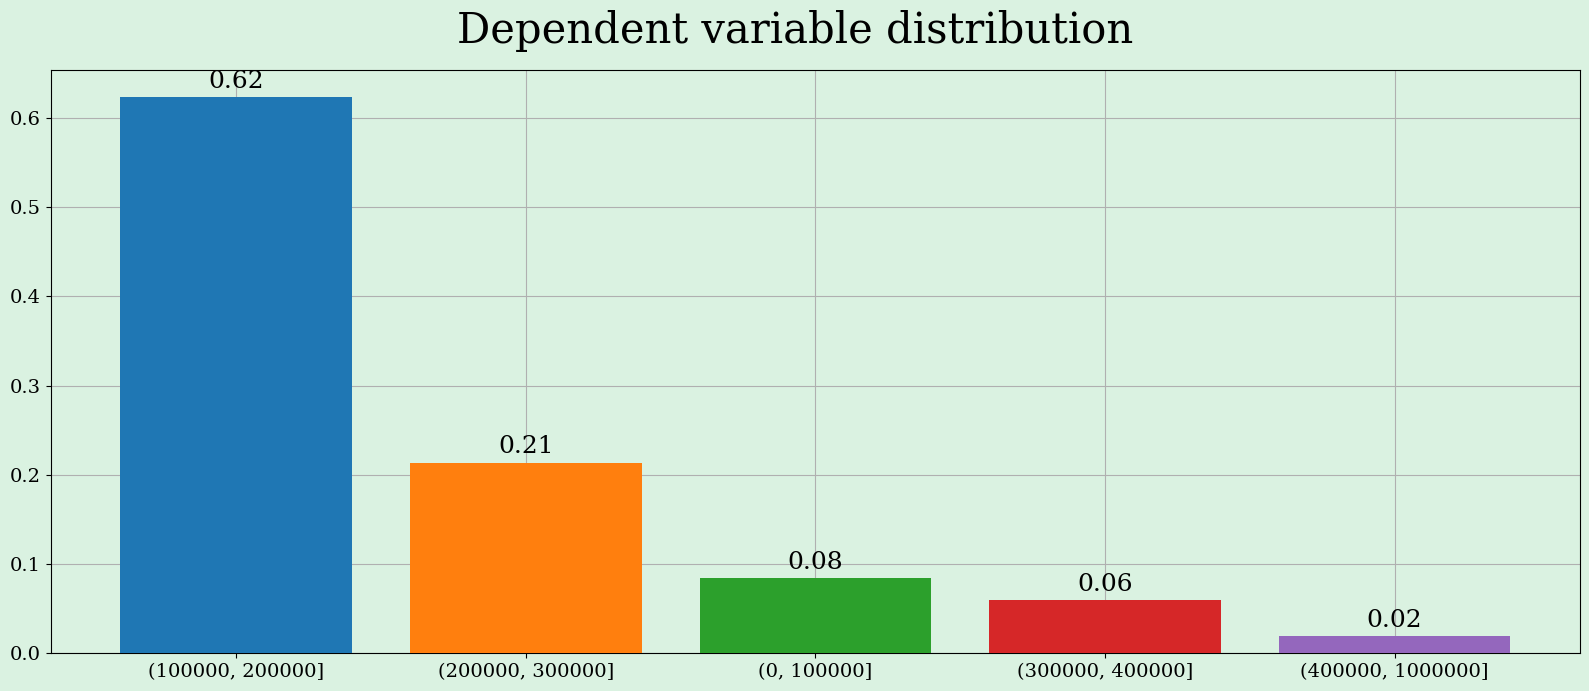

In [13]:
price_bins_counts = train['PriceBinned'].dropna().value_counts(normalize=True)[:5]
fig, ax = plt.subplots(figsize=(16, 7))
fig.suptitle('Dependent variable distribution')
rects = ax.bar(price_bins_counts.index.astype(str),
               price_bins_counts.values,
               color=cm.tab10.colors,
               zorder=3)
autolabel(rects, ax, decimals=2)
plt.tight_layout()
plt.show()

## <span style="color:#01872A;display: block; font-style: italic;padding:10px; background:#daf2e1;border-radius:20px; text-align: left; font-size: 30px; "> Step 2 results: </span>
2. Feature distributions are not normal.
3. There are 4 main price intervals:
    *      0 - 100000 -  8% of samples
    * 100000 - 200000 - 62% of samples
    * 200000 - 300000 - 21% of samples
    * 300000 - 400000 -  6% of samples
4. There are lots of features with one main feature variant. Other variants
are very unlikely. Such features are highly imbalanced (e.g. 'GarageCond',
'BsmtCond').

<div id="Step3">
</div>

# <span style="color:#01872A; display: block; padding:10px; background:#daf2e1;border-radius:20px; text-align: center; font-size: 40px; "> Step 3. Bivariate feature analysis <br>  (analysis of pairs of features). </span>

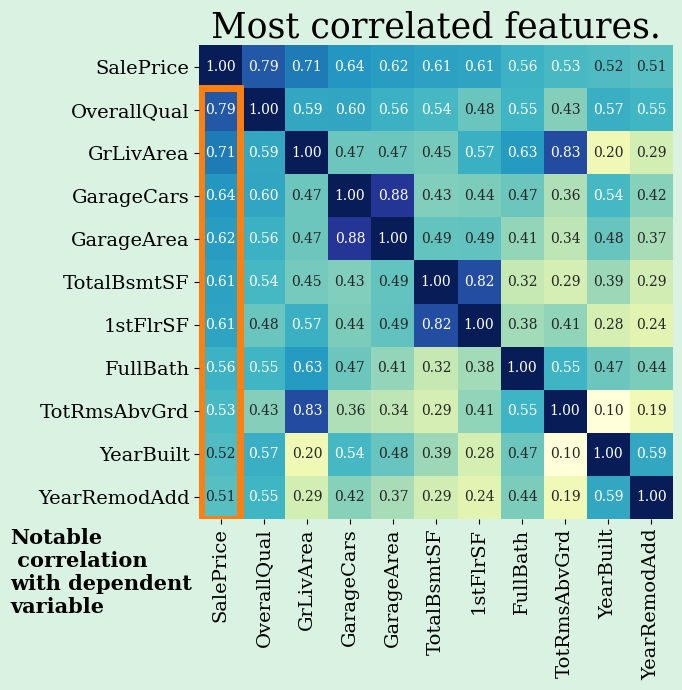

In [14]:
def plot_correlated_features(df, dependent_variable, min_threshold=None):
    import matplotlib.patches as patches

    corr = df.corr()
    sorted_index = \
        corr[dependent_variable].apply(np.abs).sort_values(ascending=False).index
    sorted_corr = corr[sorted_index].reindex(sorted_index)
    if min_threshold is not None:
        most_correlated_index = \
            sorted_corr[(sorted_corr.iloc[:, 0] >=min_threshold) |
                        (sorted_corr.iloc[:, 0] <= -min_threshold)].index
        sorted_corr = sorted_corr.loc[most_correlated_index, most_correlated_index]

    fig, ax = plt.subplots(figsize=(14, 7))
    sns.heatmap(sorted_corr, ax=ax, annot=True, fmt='.2f',
                cmap='YlGnBu', cbar=False, square=True)
    ax.set_title('Most correlated features.')
    ax.text(-0.4, -0.2, 'Notable\n correlation\nwith dependent\nvariable',
           transform = ax.transAxes, size=15, fontweight='bold')
    rect = patches.Rectangle((0.05, 1), 0.9, 10, linewidth=5, edgecolor=orange,
                             facecolor='none')
    ax.add_patch(rect)
    plt.tight_layout()
    plt.show()

    return most_correlated_index.tolist()

most_correlated_features = \
    plot_correlated_features(train, 'SalePrice', min_threshold=0.5)

Some features are highly correlated with each other:
1. 'GrLivArea', 'TotRmsAbvGrd', '1stFlrSF.
2. 'GarageCars' and 'GarageArea'.
3. 'TotalBsmtSF' and '1stFlrSF'.
4. 'YearBuilt' and 'YearRemodAdd'.
4. 'FullBath'
So it is worth using only one feature from each group.

In [15]:
most_correlated_features.remove('TotRmsAbvGrd')
most_correlated_features.remove('FullBath')
most_correlated_features.remove('1stFlrSF')
most_correlated_features.remove('GarageCars')
most_correlated_features.remove('TotalBsmtSF')
most_correlated_features.remove('YearRemodAdd')
most_correlated_features.remove('SalePrice')

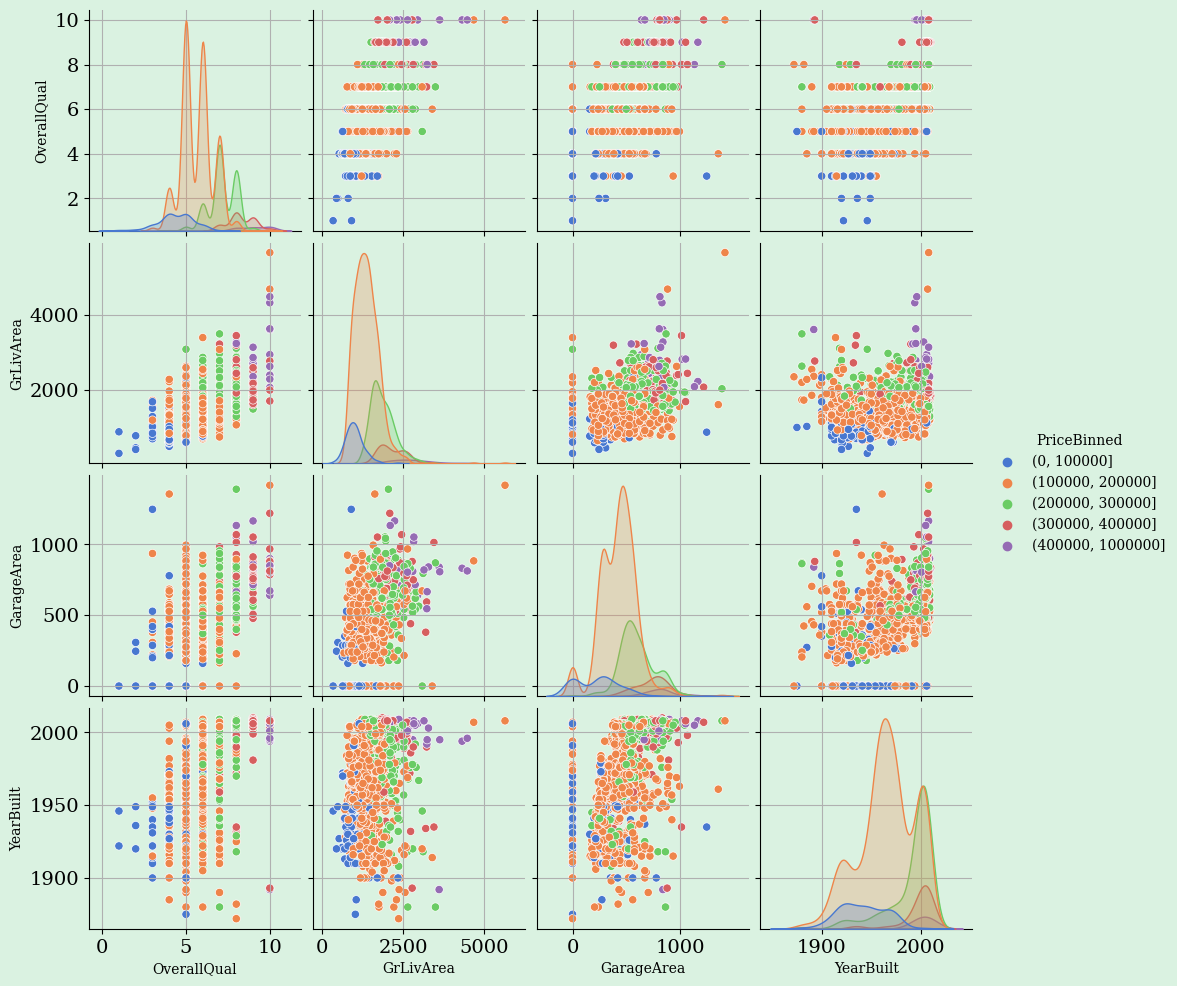

In [16]:
axes = sns.pairplot(train[most_correlated_features + ['PriceBinned']],
                    hue='PriceBinned')
plt.show()

In [17]:
def categorical_plot(df, horizontal_feature, vertical_feature,
                     vertical_classes, bottom_text=None, labels=False):
    bottom = 0
    old_rects = None
    fig, ax = plt.subplots()
    for index, vertical_class in enumerate(vertical_classes):
        p1 = ax.bar(df[horizontal_feature], df[vertical_class],
                    label=vertical_class, color=cm.tab10.colors[index],
                    zorder=3, bottom=bottom)
        bottom += df[vertical_class]
        if labels:
            autolabel(p1, ax, inside=True, old_rects=old_rects)
            if old_rects is None:
                old_rects = p1
            else:
                old_rects += p1
    ax.set_xlabel(horizontal_feature, size=20)
    ax.set_ylabel(vertical_feature, size=20)
    ax.set_xticks(df[horizontal_feature])
    ax.set_title(f'{horizontal_feature} vs. {vertical_feature}')
    ax.legend()
    if bottom_text:
        ax.text(0.25, -0.30, bottom_text, transform = ax.transAxes, size=18,
                fontweight='bold')
    plt.show()

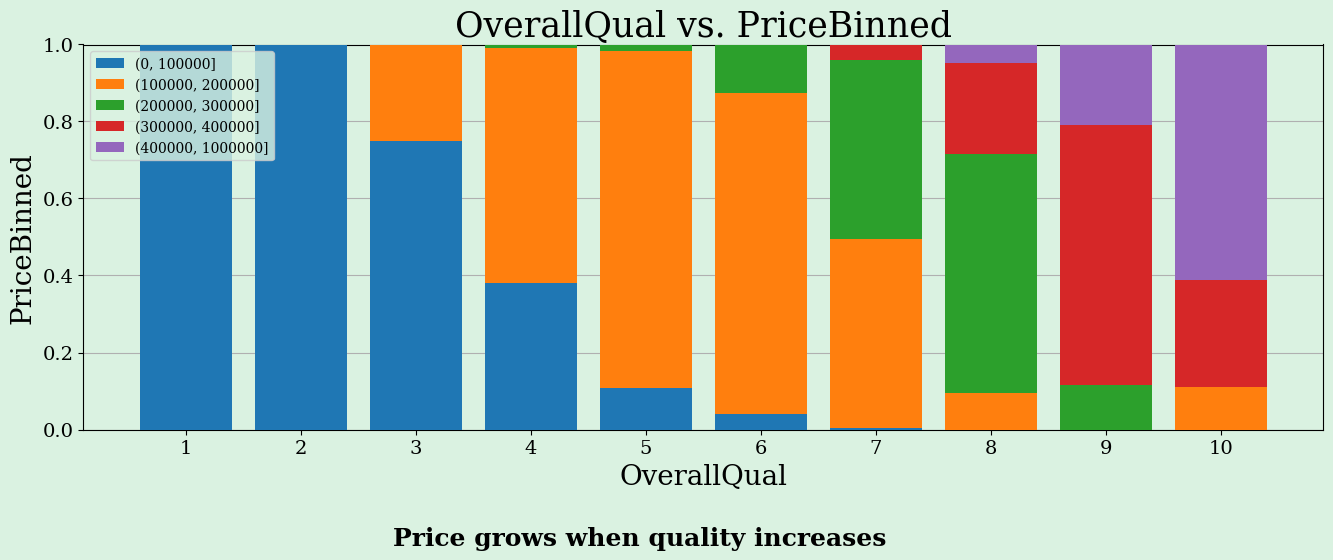

In [18]:
qual_price = pd.crosstab(train['OverallQual'], train['PriceBinned'],
                         normalize='index')
qual_price.reset_index(inplace=True)
categorical_plot(qual_price, horizontal_feature='OverallQual',
                 vertical_feature='PriceBinned',
                 vertical_classes=qual_price.columns.drop('OverallQual'),
                 bottom_text='Price grows when quality increases', labels=False)

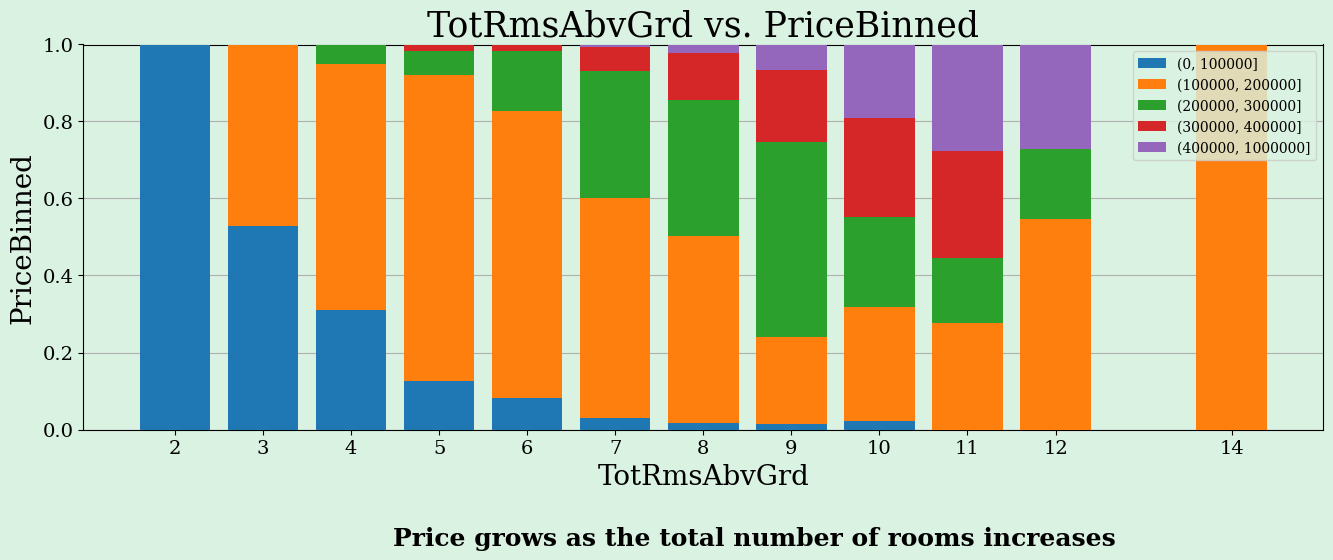

In [19]:
rooms_price = pd.crosstab(train['TotRmsAbvGrd'], train['PriceBinned'],
                         normalize='index')
rooms_price.reset_index(inplace=True)
categorical_plot(rooms_price, horizontal_feature='TotRmsAbvGrd',
                 vertical_feature='PriceBinned',
                 vertical_classes=rooms_price.columns.drop('TotRmsAbvGrd'),
                 bottom_text='Price grows as the total number of rooms '
                             'increases', labels=False)

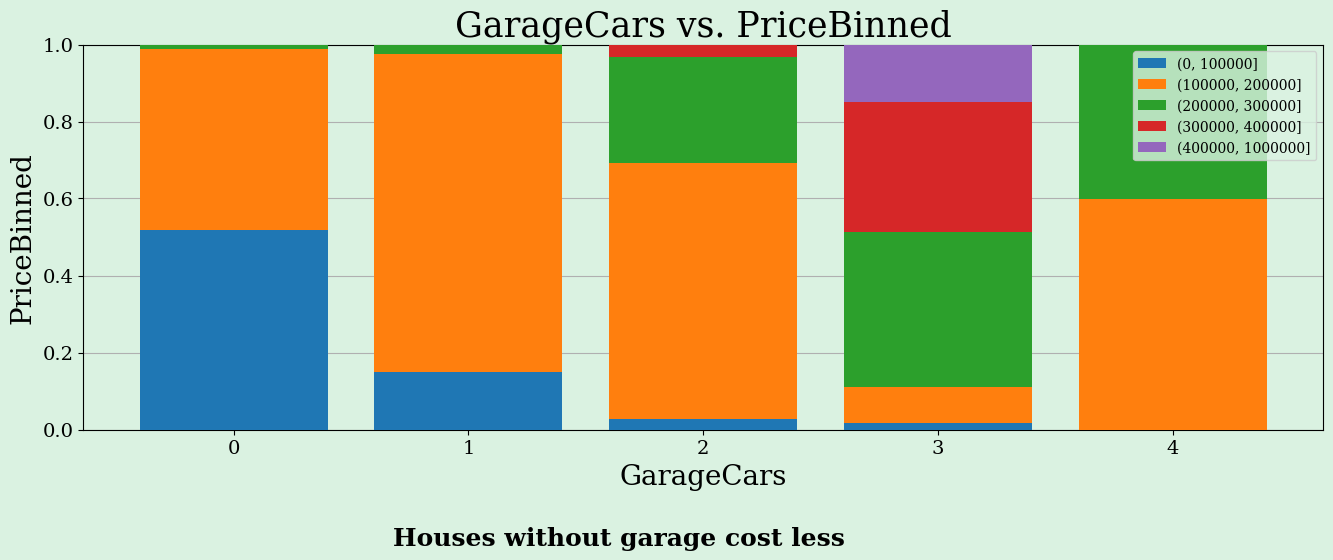

In [20]:
garage_price = pd.crosstab(train['GarageCars'], train['PriceBinned'],
                         normalize='index')
garage_price.reset_index(inplace=True)
categorical_plot(garage_price, horizontal_feature='GarageCars',
                 vertical_feature='PriceBinned',
                 vertical_classes=garage_price.columns.drop('GarageCars'),
                 bottom_text='Houses without garage cost less', labels=False)

## <span style="color:#01872A;display: block; font-style: italic;padding:10px; background:#daf2e1;border-radius:20px; text-align: left; font-size: 30px; "> Step 3 results: </span>

1. There are more than 10 features strongly correlated with dependent variable.
However, some of them are strongly correlated with each other.
2. All 'common sense' relationships hold for this dataset:
    * Larger houses cost more.
    * Larger garage increases price of a house.
    * Newer houses cost more than the elder ones.

## [Part 2. ANN.](https://nbviewer.org/github/sersonSerson/Projects/blob/master/Regression/HousePrice/02%20ANN.ipynb)

## [Part 3. Ridge regression.](https://nbviewer.org/github/sersonSerson/Projects/blob/master/Regression/HousePrice/03%20Ridge%20regression.ipynb)

## [Part 4. Ensemble.](https://nbviewer.org/github/sersonSerson/Projects/blob/master/Regression/HousePrice/04%20Ensemble.ipynb)
